# What is Kickstarter?

In short, it's a website that allows projects to be funded. These projects generally fall under the following categories: film, design & tech, arts, comics & illustrations, games, food & craft, music, or publishing.

There's a bunch of cool stuff there, like [a photobook of a former Los Alamos National Lab employee who became an antinuclear activist](https://www.kickstarter.com/projects/2005474130/atomic-ed-a-photobook-by-janire-najera?ref=home_featured) or [a rogue-like game with an infinite, procedurally-generated world](https://www.kickstarter.com/projects/360951081/achaem-infinite-roguelike-with-destructible-world?ref=recs&ref=discovery). (N.b. I am not affiliated with either project, but I just scrolled through random projects to see what's out there).

# How do you get funding?

Well, that's the main thing I'd like to answer. Intuitively, you would think that if a project is "cool" enough (whatever that means) then it ought to get funded. Digging deeper, you'd have to answer what "cool enough" actually means. I'd think that to define that more fully, you'd actually have to see how the project is advertised. For example, there's a very large difference between describing a drone as a "flying robot" vs a "robot with multi-directional flight capabilities and lasers that shoot sharks." Here, it should be obvious which is the more convincing, enticing, and cooler of the two projects (and if you can't tell, then I apologize for your boring life). Thankfully, that data was recorded and will, of course, be helpful. There are other data such as the launch date and deadline. I won't look at data such as the amount actually pledged to the project because of course a project is funded if that amount is over the target goal. It might be interesting to see if the other data determines how much money will be raised relative to the goal, but that's a question for another time. Remember that generally we want to use information that was true prior to the event of deciding if the project was funded, so only some columns will be used.

In [1]:
import pandas as pd

c:\users\jeff\documents\data_sci\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# Data cleaning

There are some extra columns in here; I'm not exactly sure they are but they don't seem to hold useful information so I'm taking them out. A little detail to notice is that the encoding is actually ```latin1``` for some reason so use that if the ```utf-8``` encoding doesn't seem to work. (N.b. I manually fixed the column names in the ```2016``` csv file because there were extra spaces. It makes the ```read_csv``` statements more symmetric. Just a personal preference).

In [2]:
fields = ['name','category','main_category','deadline','goal','launched','backers','state']


df_201612 = pd.read_csv('ks-projects-201612.csv', sep=',', header=0, encoding='latin1', usecols=fields)
df_201801 = pd.read_csv('ks-projects-201801.csv', sep=',', header=0, encoding='latin1', usecols=fields)

Later I plan to examine the difference in the launch and deadline times so I'm converting the relevant columns into something usable. Some values in the column are not times so I coerce them into ```NaT```.

In [3]:
df_201612['deadline'] = pd.to_datetime(df_201612['deadline'], errors='coerce')
df_201612['launched'] = pd.to_datetime(df_201612['launched'], errors='coerce')

In [4]:
df_201801['deadline'] = pd.to_datetime(df_201801['deadline'], errors='coerce')
df_201801['launched'] = pd.to_datetime(df_201801['launched'], errors='coerce')

Extra filtering for the ```2016``` dataframe because there are some ```NaT```s in there.

In [5]:
df_201612 = df_201612.dropna()

df = pd.concat([df_201612,df_201801])

I'll do a bit more cleaning up here.

I'll consider the positive examples to be the ones labeled by ```successful``` and the negative examples to be the ones labeled by ```failed``` and ```canceled```. Later, I think I will consider ```suspended``` projects to be a part of negative examples, though those seem to be cases that break some rules on Kickstarter. I'm going to make a guess here and say that the creators of those particular projects are smart enough to disguise the product with a name that doesn't raise any suspicions.

Additionally, I'm going to combine the ```deadline``` and ```launched``` feature into ```duration``` to explore how a time limitation can affect the success of a project. It might be interesting to observe how the ```deadline``` or ```launched``` dates can affect the success. While I expect that people who are into the whole Kickstarter thing might check regularly, it is possible that there actually is some cyclic structure.

In [6]:
df.loc[(df['state'] == 'failed') | (df['state'] == 'canceled'), 'state'] = 1
df.loc[df['state'] == 'successful', 'state'] = 0

df['duration'] = (df['deadline'] - df['launched']).dt.days

df['goal'] = df['goal'].astype(float)

I'm splitting up the data frames into the positive and negative examples to see how individual features can affect the success of the Kickstarter project.

In [7]:
df_bad = df[df['state'] == 0].drop(columns='state')
df_good = df[df['state'] == 1].drop(columns='state')

In [8]:
df_bad.head()

,name,category,main_category,deadline,goal,launched,backers,duration
4,Monarch Espresso Bar,Restaurants,Food,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,224,35
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,16,20
10,Lisa Lim New CD!,Indie Rock,Music,2013-04-08 06:42:58,12500.0,2013-03-09 06:42:58,100,30
16,Mike Corey's Darkness & Light Album,Music,Music,2012-08-17 14:11:32,250.0,2012-08-02 14:11:32,7,15
18,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,2013-12-30 07:06:11,20000.0,2013-11-25 07:06:11,624,35


# Data exploration

In [9]:
import matplotlib.pyplot as plt

In [10]:
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

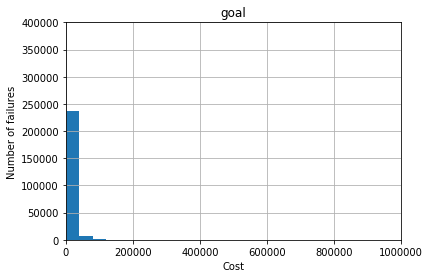

In [11]:
fig, ax = plt.subplots()

ax.set_xlim(0, 1e6)
ax.set_ylim(0, 4e5)

ax.set_xlabel('Cost')
ax.set_ylabel('Number of failures')

bad_axes = df_bad.hist(column='goal', ax=ax, bins=50)

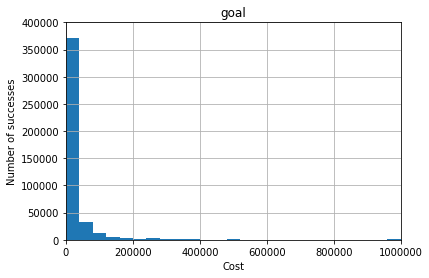

In [12]:
fig, ax = plt.subplots()

ax.set_xlim(0, 1e6)
ax.set_ylim(0, 4e5)

ax.set_xlabel('Cost')
ax.set_ylabel('Number of successes')

good_axes = df_good.hist(column='goal', ax=ax, bins=2500)

Plotting the positive and negative examples on the same scale, I was personally a bit surprised that the positive examples showed that there were actually quite a number of projects that were funded even with higher costs. In terms of distributions, maybe this is not so surprising because by having more positive samples the chances of finding an outlier increases. I think a more likely explanation would be that the creators of a high-cost project have good knowledge of what people would back (I would reference the [Myst 25th Anniversary Collection](https://www.kickstarter.com/projects/1252280491/myst-25th-anniversary-collection) because it was an extremely popular game and it appeals to a sense of nostalgia) and so the risk of starting a high cost project is actually almost none at all (side note: the total funding for the Myst Kickstarter was at $2.8 million, about 11 times more than the goal).

If you consider the ratios of the successful to unsuccessful Kickstarters, you'll see that the higher-cost projects actually have a much better chance of being funded, probably for reasons like I mentioned above. What this tells me is that a huge difference probably lies somewhere in the low-cost projects. Maybe the low-cost projects tend to be that way because the ideas in those Kickstarters are not particularly well thought-out. Or maybe they are well thought-out, but the creator is underselling the product, undervaluing it, and something about the description and/or title of the Kickstarter is a signal to the backers that the project is not worth selling.

Another general principle would be that Kickstarters that are pretty niche will not have as many backers, and therefore not as much money to go through with the project. Kickstarter projects that have more general appeal (e.g. things that make food, games that multiple people can play, or even cool tech gadgets that have great utility) would more likely get funded. Things that are more artsy may only appeal to a small group of people, though there are lots of artsy things out there which are popular because there's some sort of reference to popular culture (and on that note, there are definitely tech-oriented Kickstarters which are totally niche and may barely get funding or fall short of its goal).

The following is some exploration in the categories of the data.